<img src='https://user-images.githubusercontent.com/6457691/90080969-0f758d00-dd47-11ea-8191-fa12fd2054a7.png' width = '200' align = 'right'>

## AIB / SECTION 3 / SC33x 

---



# Major Neural Network Architectures

이번 한 주간 CNN, U-Net, Autoencoder, GAN 등 다양한 주요 신경망 구조들에 대해서 배워봤습니다. 오늘은 그 모델들을 복습하는 시간을 가지도록 하겠습니다. 이 SC는 **신경망의 다양한 구조에 대한 이해와 지식**을 평가합니다. **모델을 높은 정확도를 가지도록 학습 시킬 수 있는지를 평가하려는 것이 아닙니다.**

아래의 방식들은 복잡한 연산을 요구합니다. 모든 파트의 문제들은 어떤 환경에서라도 (e.g. 로컬 주피터, Google Colab, etc.) 5-10분 내외로 결과값이 나오도록 제작이 됐기 때문에 만일 결과값을 도출하는데 그 이상의 시간이 걸린다면 여러분의 접근 방식을 재점검해보시기 바랍니다.

---

## 1. CNN

### 이미지 분류
Keras와  [ResNet50v2](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet_v2) (pre-trained)을 활용하여 `im_frog` 폴더에 있는 이미지 중 어떤 이미지에 개구리가 있는지 찾는 이미지 분류 모델을 작동시켜 보겠습니다.

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>

## 2.1 Resnet$V_2$을 사용하기 위해서 전처리 함수를 사용하여 이미지를 전처리 하고 이미지들의 사이즈를 재조정하는 함수를 정의해봅시다.

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


- **파일 경로와 이름을 불러옵니다.**

In [ ]:
import os

frog_dir = 'drive/MyDrive/Colab Notebooks/ai_sc33x/im_frog/'

In [ ]:
"""Hint : os 패키지 내에 파일 이름을 불러올 수 있는 메서드를 사용합니다."""
filenames = os.listdir(frog_dir)
print(filenames)

['priscilla-du-preez-oWJcgqjFb6I-unsplash.jpg', 'matthew-kosloski-sYkr-M78H6w-unsplash.jpg', 'drew-brown-VBvoy5gofWg-unsplash.jpg', 'saturday_sun-_q37Ca0Ll4o-unsplash.jpg', 'cristiane-teston-bcnfJvEYm1Y-unsplash.jpg', 'marcus-neto-fH_DOdTt-pA-unsplash.jpg', 'ed-van-duijn-S1zA6AR50X8-unsplash.jpg', 'yanna-zissiadou-SV-aMgliWNs-unsplash.jpg', 'mche-lee-j-P8z4EOgyQ-unsplash.jpg', 'zdenek-machacek-HYTwWSE5ztw-unsplash (1).jpg', 'serenity-mitchell-tUDSHkd6rYQ-unsplash.jpg', 'jared-evans-VgRnolD7OIw-unsplash.jpg', 'elizabeth-explores-JZybccsrB-0-unsplash.jpg', 'jacky-watt-92W5jPbOj48-unsplash.jpg', 'joel-henry-Rcvf6-n1gc8-unsplash.jpg']


- **필요한 라이브러리 import 후 이미지를 불러와 예측하는 함수를 정의합니다.**

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf
import numpy as np
from PIL import Image

In [ ]:
def load_and_preprocessing(base_dir, name, model):
    """
    이미지 1장을 받아 모델로 예측한 뒤
    가장 확률이 높은 클래스 번호를 출력하는 함수입니다.
    
    Hint:
        1. 
        2. array의 값을 직접 나누어 픽셀 값을 정규화합니다.
        
    Args:
        base_dir : 이미지 파일이 있는 경로입니다.
        name : 이미지 파일의 이름입니다.
        model : 예측에 사용할 모델입니다.
    """
    image_path = base_dir
    image = load_img(image_path + name)
    image = tf.image.resize(image,[224,224])
    input_arr = img_to_array(image) / 255
    
    input_arr = np.array([input_arr])
    predictions = model.predict(input_arr)
    predict_class = np.argmax(predictions, axis=1) 
    print(predict_class[0])

    return predict_class[0]

## 2.2 ResNet50v2 모델을 사용해 이미지 분류(예측)를 진행합니다. 예측 결과는 자유롭게 출력해봅니다.
> 참고: `ResNet50v2`는 "frog"로 예측하지 않습니다. "frog"의 label은 "bullfrog, treefrog, tailed frog"입니다

In [ ]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, decode_predictions, preprocess_input

resnetV2 = ResNet50V2(weights='imagenet', include_top = True, input_shape=(224,224,3))
resnetV2.summary()

102869336/102869336 [==============================] - 1s 0us/step
Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                      

- **기존에 정의한 함수(`load_and_preprocessing`)를 사용하여 이미지 분류를 진행하여봅니다.**

In [ ]:
# 출력되는 클래스의 번호를 모두 리스트에 저장하여 predict_class 에 할당합니다.

predict_class = [load_and_preprocessing(base_dir = frog_dir,name = filename, model = resnetV2) for filename in filenames]

1/1 [==============================] - 9s 9s/step
58
1/1 [==============================] - 0s 36ms/step
397
1/1 [==============================] - 0s 41ms/step
30
1/1 [==============================] - 0s 23ms/step
58
1/1 [==============================] - 0s 27ms/step
309
1/1 [==============================] - 0s 24ms/step
738
1/1 [==============================] - 0s 23ms/step
308
1/1 [==============================] - 0s 33ms/step
113
1/1 [==============================] - 0s 27ms/step
985
1/1 [==============================] - 0s 23ms/step
31
1/1 [==============================] - 0s 24ms/step
985
1/1 [==============================] - 0s 25ms/step
32
1/1 [==============================] - 0s 26ms/step
807
1/1 [==============================] - 0s 25ms/step
868
1/1 [==============================] - 0s 23ms/step
31


- **클래스의 이름을 다운받아 출력하여봅니다.**

In [ ]:
!git clone https://github.com/anishathalye/imagenet-simple-labels.git

Cloning into 'imagenet-simple-labels'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 21 (delta 1), reused 10 (delta 1), pack-reused 10
Unpacking objects: 100% (21/21), 10.78 KiB | 1.54 MiB/s, done.


In [ ]:
import json

with open ('/content/imagenet-simple-labels/imagenet-simple-labels.json') as f:
    labels = json.load(f)

for i in predict_class:
    print(labels[i])

water snake
pufferfish
American bullfrog
water snake
bee
pot
fly
snail
daisy
tree frog
daisy
tailed frog
solar thermal collector
tray
tree frog


---

## 2. U-Net

Lecture Note에서는 U-Net의 백본(backbone)모델로 `MobileNetV2`를 사용하여 segmentation을 수행하였습니다.<br/>
이번 SC에서는 ResNet50을 백본으로 하여 같은 문제를 풀어보세요.

참고로 resnet에서의 block은 아래 예시의 3개의 레이어를 참조하여 만들어주세요.<br/>
예시는 16x16 까지만 나타나 있지만 Lecture Note 와 같이 4x4까지 만들어 주어야 모델을 완성할 수 있습니다.

**(최소 `model.complie`까지 진행해야 점수가 부여됩니다!!)**

```
    'conv1_relu', # 64x64
    'conv2_block3_out', # 32x32 
    'conv3_block4_out', # 16x16
```

In [2]:
import tensorflow as tf
img_shape = (224,224,3)
base_model = tf.keras.applications.ResNet50(input_shape=img_shape, include_top=False)
layer_names=[layer.name for layer in base_model.layers]
print(layer_names)


94765736/94765736 [==============================] - 1s 0us/step
['input_1', 'conv1_pad', 'conv1_conv', 'conv1_bn', 'conv1_relu', 'pool1_pad', 'pool1_pool', 'conv2_block1_1_conv', 'conv2_block1_1_bn', 'conv2_block1_1_relu', 'conv2_block1_2_conv', 'conv2_block1_2_bn', 'conv2_block1_2_relu', 'conv2_block1_0_conv', 'conv2_block1_3_conv', 'conv2_block1_0_bn', 'conv2_block1_3_bn', 'conv2_block1_add', 'conv2_block1_out', 'conv2_block2_1_conv', 'conv2_block2_1_bn', 'conv2_block2_1_relu', 'conv2_block2_2_conv', 'conv2_block2_2_bn', 'conv2_block2_2_relu', 'conv2_block2_3_conv', 'conv2_block2_3_bn', 'conv2_block2_add', 'conv2_block2_out', 'conv2_block3_1_conv', 'conv2_block3_1_bn', 'conv2_block3_1_relu', 'conv2_block3_2_conv', 'conv2_block3_2_bn', 'conv2_block3_2_relu', 'conv2_block3_3_conv', 'conv2_block3_3_bn', 'conv2_block3_add', 'conv2_block3_out', 'conv3_block1_1_conv', 'conv3_block1_1_bn', 'conv3_block1_1_relu', 'conv3_block1_2_conv', 'conv3_block1_2_bn', 'conv3_block1_2_relu', 'conv3_bloc

In [3]:
base_model.get_layer('conv1_conv').output

<KerasTensor: shape=(None, 112, 112, 64) dtype=float32 (created by layer 'conv1_conv')>

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 model_2 (Functional)           [(None, 112, 112, 6  23587712    ['input_5[0][0]']                
                                4),                                                               
                                 (None, 56, 56, 256                                               
                                ),                                                                
                                 (None, 28, 28, 512                                         

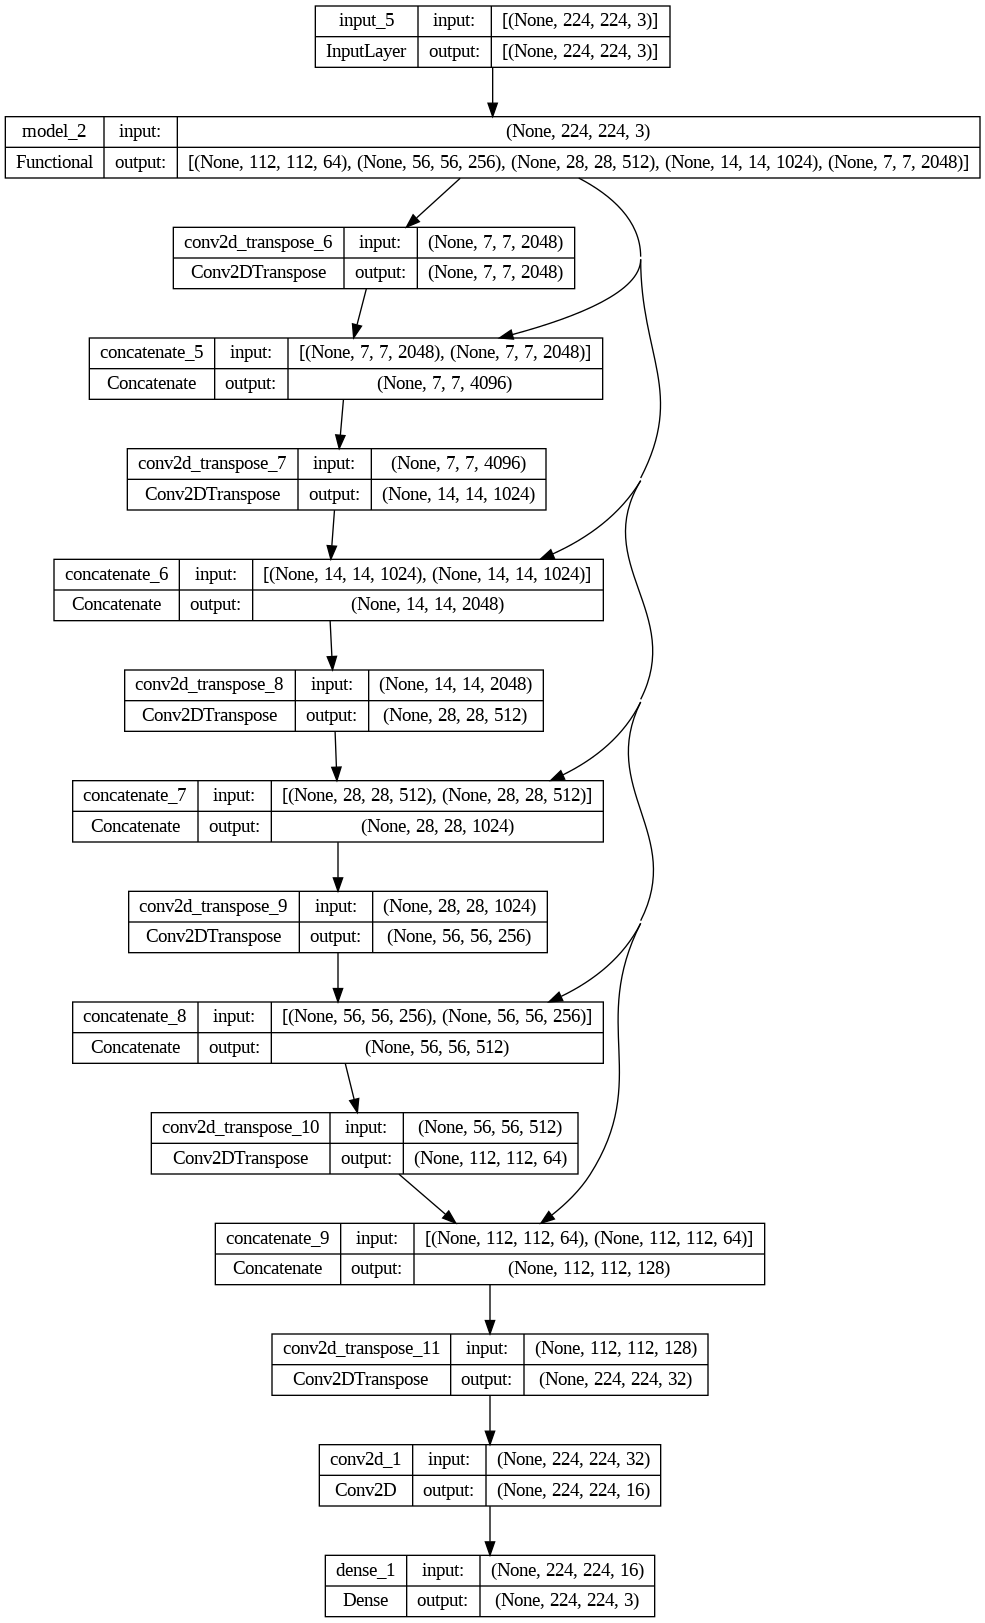

In [44]:
img_shape = (224,224,3)
base_model = tf.keras.applications.ResNet50(input_shape=img_shape, include_top=False)
down_stack=tf.keras.Model(inputs=[base_model.input],
                       outputs=[
                                base_model.get_layer(name='conv1_relu').output,
                                base_model.get_layer(name='conv2_block3_out').output,
                                base_model.get_layer(name='conv3_block4_out').output,
                                base_model.get_layer(name='conv4_block5_out').output,
                                base_model.get_layer(name='conv5_block3_out').output
])

down_stack.trainable = False

i=tf.keras.Input(shape=img_shape)

out, out1, out2, out3, out4 = down_stack(i)

A = 2048
B = 1024
C = 512
D = 256

out_u = tf.keras.layers.Conv2DTranspose(A, 3,strides=1,padding='same')(out4)
out_u = tf.keras.layers.Concatenate()([out_u,out4])

out_u = tf.keras.layers.Conv2DTranspose(B, 3,strides=2,padding='same')(out_u)
out_u = tf.keras.layers.Concatenate()([out_u,out3])

out_u = tf.keras.layers.Conv2DTranspose(C, 3,strides=2,padding='same')(out_u)
out_u = tf.keras.layers.Concatenate()([out_u,out2])

out_u = tf.keras.layers.Conv2DTranspose(D, 3,strides=2,padding='same')(out_u)
out_u = tf.keras.layers.Concatenate()([out_u,out1])

out_u = tf.keras.layers.Conv2DTranspose(64, 3,strides=2,padding='same')(out_u)
out_u = tf.keras.layers.Concatenate()([out_u,out])

out_u = tf.keras.layers.Conv2DTranspose(32, 3,strides=2,padding='same')(out_u)

out_u = tf.keras.layers.Conv2D(16, 3, activation='elu', padding='same') (out_u)
out_u = tf.keras.layers.Dense(3,activation='softmax')(out_u)

resnet_model = tf.keras.Model(inputs=[i], outputs=[out_u])

resnet_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), #from_logits=True),
              metrics=['accuracy'])

resnet_model.summary()

tf.keras.utils.plot_model(resnet_model, show_shapes=True)

In [5]:
!pip install -U tfds-nightly


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 48.4 MB/s eta 0:00:00


In [6]:
import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar() # 해당 코드 사용시 Tqdm 진행률(다운로드 진행 표시) 표시줄을 비활성화합니다.

from IPython.display import clear_output
import matplotlib.pyplot as plt
     

In [7]:
dataset, info = tfds.load('oxford_iiit_pet:3.*.*', with_info=True)


Dataset oxford_iiit_pet downloaded and prepared to /root/tensorflow_datasets/oxford_iiit_pet/3.2.0. Subsequent calls will reuse this data.


In [8]:
def normalize(input_image, input_mask):
    """
    이미지를 정규화하는 코드입니다.
    각 픽셀값을 최댓값인 255로 나누어줍니다.
    """
    input_image = tf.cast(input_image, tf.float32) / 255.0
    input_mask -= 1
    return input_image, input_mask

def load_image_train(datapoint):
    """
    훈련 데이터셋에 해당하는 이미지와 레이블을 불러오는 함수입니다.
    불러오는 과정에서 사이즈를 조정하고 이미지 증강에 해당하는 filp 및 정규화를 적용합니다.
    """
    input_image = tf.image.resize(datapoint['image'], (224, 224))
    input_mask = tf.image.resize(datapoint['segmentation_mask'], (224, 224))

    # 이미지 증강을 적용합니다.
    # flip_left_right는 이미지를 (왼쪽에서 오른쪽)으로 좌우 반전합니다.
    if tf.random.uniform(()) > 0.5:  # 절반만 좌우 반전합니다.
        input_image = tf.image.flip_left_right(input_image) 
        input_mask = tf.image.flip_left_right(input_mask)

    # 위에서 설정한 normalize 함수를 적용합니다.
    input_image, input_mask = normalize(input_image, input_mask)

    return input_image, input_mask

def load_image_test(datapoint):
    """
    시험 데이터셋에 해당하는 이미지와 레이블을 불러오는 함수입니다.
    불러오는 과정에서 사이즈를 조정하고 정규화를 적용합니다.
    """
    input_image = tf.image.resize(datapoint['image'], (224, 224))
    input_mask = tf.image.resize(datapoint['segmentation_mask'], (224, 224))

    input_image, input_mask = normalize(input_image, input_mask)

    return input_image, input_mask

In [9]:
TRAIN_LENGTH = info.splits['train'].num_examples
BATCH_SIZE = 64
BUFFER_SIZE = 1000
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

train = dataset['train'].map(load_image_train, num_parallel_calls=tf.data.experimental.AUTOTUNE)
test = dataset['test'].map(load_image_test)

In [10]:
train_dataset = train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

# prefetch는 현재 요소가 처리되는 동안 다음 요소를 준비합니다. 이로 인해 지연 시간 및 처리량을 향상시킵니다.
# tf.data.AUTOTUNE사용되면 버퍼 크기가 동적으로 조정됩니다.
train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset = test.batch(BATCH_SIZE)

In [43]:
# for image, mask in train.take(1):
#     sample_image, sample_mask = image, mask
#     print(mask.numpy().max())
#     # print(tf.keras.preprocessing.image.array_to_img(mask))
#     # plt.imshow(tf.keras.preprocessing.image.array_to_img(mask))


2.0


In [24]:
def display(display_list): # display_list -> [sample_image, sample_mask]
    """
    입력 이미지와 타겟 레이블, 예측 레이블의 결과를 시각화하는 함수입니다.
    """
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)): # len(display_list) = 2
        plt.subplot(1, len(display_list), i+1) # input image 0 true mask 1
        plt.title(title[i])
        # 3D Numpy 배열을 PIL 이미지 인스턴스로 변환합니다.
        # 여기서 PIL(Python Imaging Library)은 파이썬을 이용해서 쉽게 이미지 프로세싱을 할 수 있게 주는 라이브러리입니다.
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i])) 
        plt.axis('off')
    plt.show()


def create_mask(pred_mask):
    """
    예측 시 픽셀의 레이블을 확정하는 함수입니다.
    """
    pred_mask = tf.argmax(pred_mask, axis=-1)   # 클래스 축에서 tf.argmax를 사용하여 가장 큰 값을 가진 인덱스를 반환합니다.
    pred_mask = pred_mask[..., tf.newaxis]    # tf.newaxis를 활용하여 새롭게 축을 생성할 수 있습니다.
    return pred_mask[0]


def show_predictions(dataset=None, num = 1,model = resnet_model):
    """
    예측한 레이블을 시각화하는 함수입니다.
    """
    if dataset:
        for image, mask in dataset.take(num):
            pred_mask = model.predict(image)
            display([image[0], mask[0], create_mask(pred_mask)])
    else:
        display([sample_image, sample_mask,
                create_mask(model.predict(sample_image[tf.newaxis, ...]))])
        
        
class DisplayCallback(tf.keras.callbacks.Callback):
    """
    에포크마다 보여줄 수 있되
    매 에포크마다 이전 결과가 지워지도록 하는 Callback 클래스 입니다.
    """
    def on_epoch_end(self, epoch, logs=None):
        clear_output(wait=True)
        show_predictions()
        print ('\n에포크 이후 예측 예시 {}\n'.format(epoch+1))

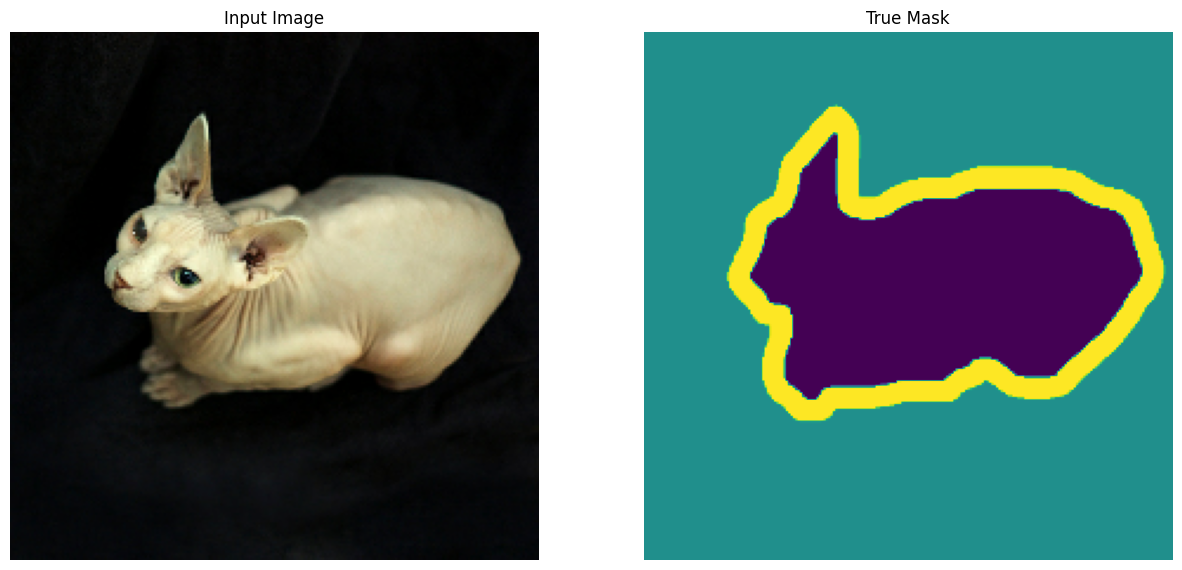

1/1 [==============================] - 0s 73ms/step


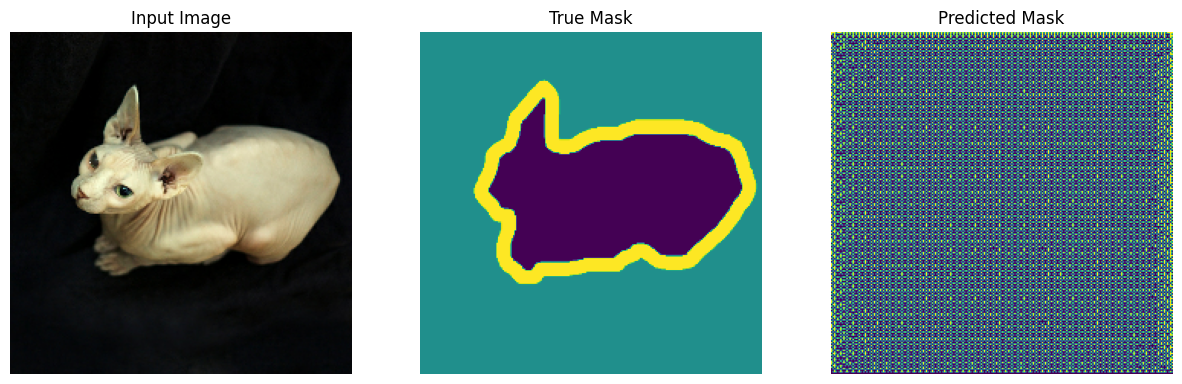

(224, 224, 3)


In [25]:
for image, mask in train.take(1):
    sample_image, sample_mask = image, mask

display([sample_image, sample_mask])

show_predictions()

1/1 [==============================] - 0s 52ms/step


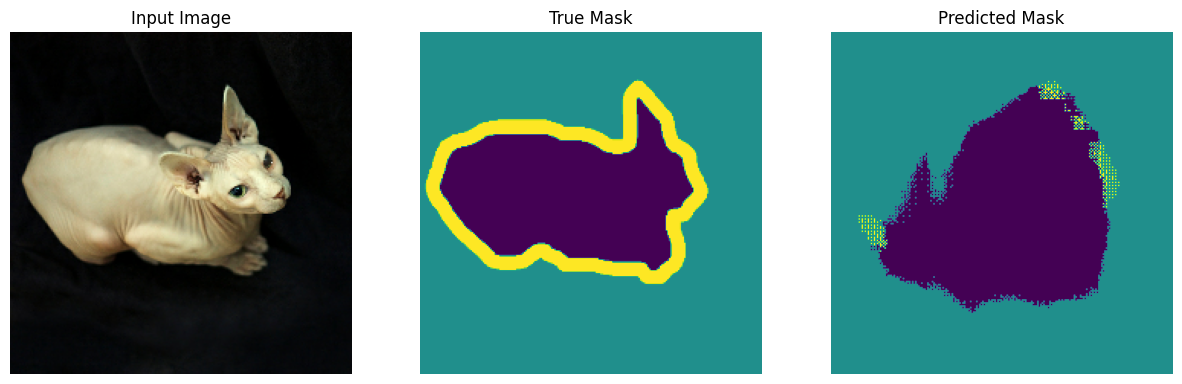


에포크 이후 예측 예시 20

57/57 [==============================] - 97s 2s/step - loss: 0.6429 - accuracy: 0.7302 - val_loss: 0.6379 - val_accuracy: 0.7292


In [ ]:
EPOCHS = 20
# 5개의 검증 분할을 수행합니다.
VAL_SUBSPLITS = 5   
# validation_steps는 한 번 epoch 돌 고난 후, validation set을 통해 validation accuracy를 측정할 때 validation set을 몇 번 볼 것인지를 정해줍니다. validation data수/배치사이즈로 사용합니다.
VALIDATION_STEPS = info.splits['test'].num_examples//BATCH_SIZE//VAL_SUBSPLITS  

resnet_model_history = resnet_model.fit(train_dataset, epochs=EPOCHS,
                          steps_per_epoch=STEPS_PER_EPOCH,
                          validation_steps=VALIDATION_STEPS,
                          validation_data=test_dataset,
                          callbacks=[DisplayCallback()]) # 위 셀에서 설정한 콜백 클래스를 적용합니다.
     

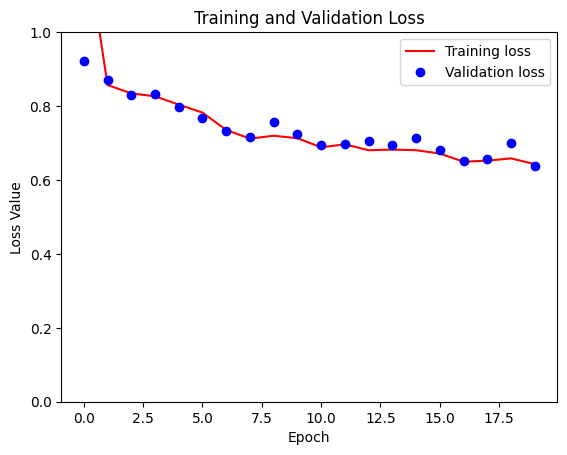

In [ ]:

loss = resnet_model_history.history['loss']
val_loss = resnet_model_history.history['val_loss']

epochs = range(EPOCHS)

plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'bo', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 1])
plt.legend()
plt.show()

2/2 [==============================] - 1s 405ms/step


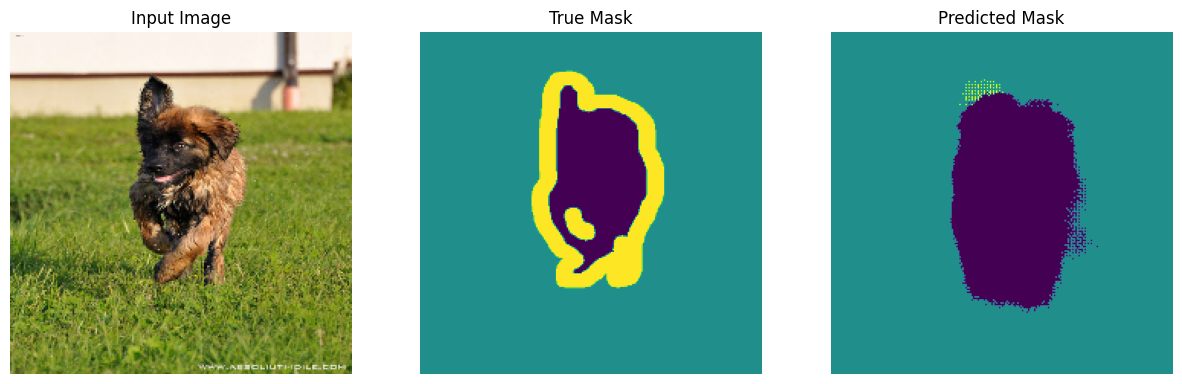

2/2 [==============================] - 1s 395ms/step


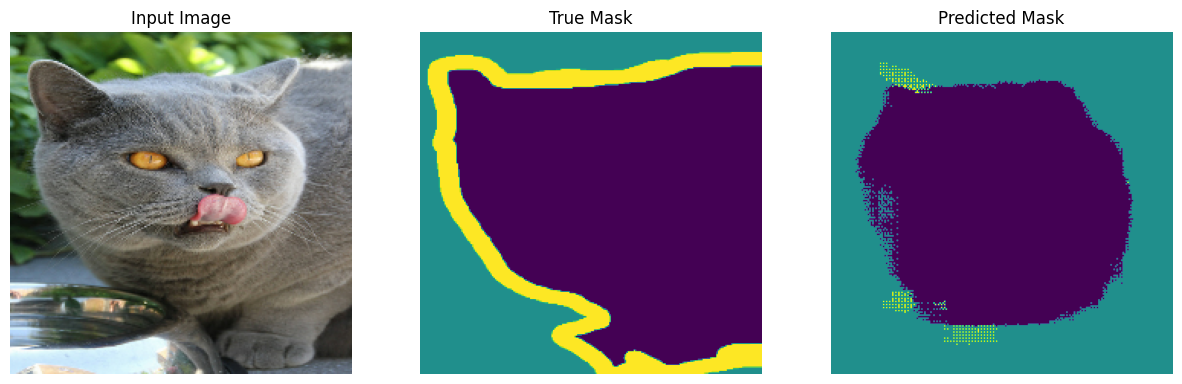

2/2 [==============================] - 1s 402ms/step


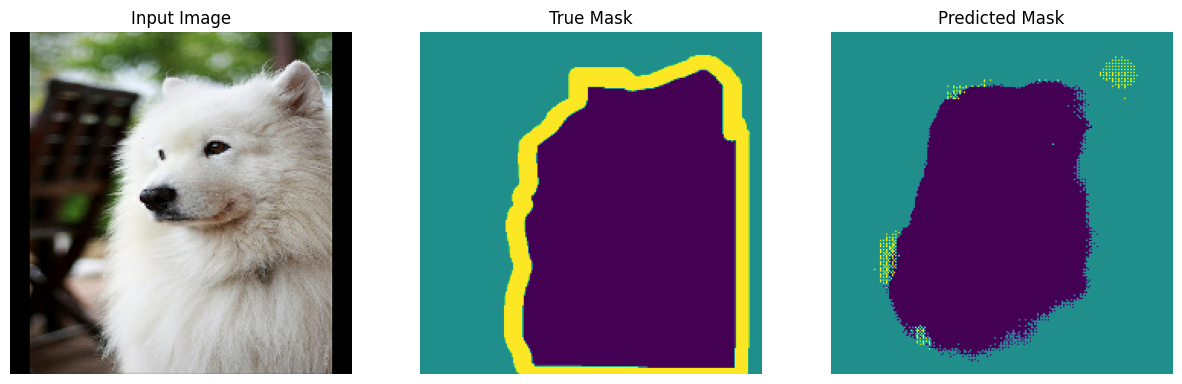

In [ ]:
show_predictions(test_dataset, 3, model = resnet_model)

## 3. Free Response
> 동료들에게 설명한다고 생각하고 간단하게 몇 문장으로 작성하세요.

### 3.1 딥러닝이 왜 중요하다고 생각하시나요?

딥러닝은 주어진 자료에 대해서 스스로 중요한 정보나 패턴 등을 찾아내어 학습하는데 탁월하기 때문에, 하드웨어 성능이 꾸준히 향상될 경우 인간을 뛰어넘는 능력을 보여줄 가능성이 매우 높다.

### 3.2 딥러닝의 다양한 분야 중에서 좀 더 심도있게 배우고 싶은 분야는 무엇인가요? 왜 그렇게 생각하시나요?

멀티 모달에 대해서 배우고 싶다. 인간이 육감을 통해 세계를 지각하듯이 인공지능 또한 다양한 인풋 정보들을 통해 학습하는 방식이 미래에 반드시 등장하게 될 것이라고 생각해서 멀티 모달에 대해 배우고 싶다.




### 3.3 인공지능이 우리 사회에서 대체할 수 있는 직업이 무엇이라고 생각하시나요?


인간의 능력이 하드웨어의 성능을 뛰어넘지 못하는 직업은 모두 대체될 것이라고 생각한다. 하드웨어의 성능이 계속 향상되고 있기 때문에 결국 모든 직업이 인공지능에 의해 대체될 후보군에 있지만, 인공지능으로 대체할 지에 대한 결정은 결국 사회 구성원들의 합의에 따라 결정될 것이다. 

### 3.4 반대로 인공지능 때문에, 딥러닝 때문에 더 생겨날 직업은 무엇이 있을까요?


인공지능에 대항할 수 있는 능력을 지닌 채 인공지능과 인간이 공존하는 사회의 지속성을 위해 다방면에서 인공지능을 통제하거나 견제하는 직업이 생겨날 것이다.

### 3.5 여러분이 생각하실 때 Strong AI라고 불리우는 [일반 인공지능 (Artificial General Intelligence)](https://ko.wikipedia.org/wiki/%EC%9D%B8%EA%B3%B5_%EC%9D%BC%EB%B0%98_%EC%A7%80%EB%8A%A5)을 개발해내는 것이 가능할 것 같나요? 왜 그렇게 생각하시나요?

현재 인공지능 연구의 발전 속도를 보았을 때, AI가 최소 인간의 사고 및 학습 체계를 스스로 습득할 가능성이 크고, 그 순간을 기점으로 인간의 뇌보다 더 강력한 하드웨어를 가진 인공지능이 인간의 상상과 예측에서 벗어나 통제불가 상태가 될 것이다.

### 3.6 Coutinous learning에 대해서 조사해보고 인지한 부분에 대해서 작성해보세요.

평생학습이라는 말이 있듯이 인공지능이 시간이 지나도 유용한 성능을 보이기 위해서는 계속 발전 및 학습해야 한다. Coutinous learning 는 평생 학습으로 표현할 수 있고, 인공지능에서 평생 학습 방법으로 기존 모델의 weight를 계속 업데이트하거나 모델의 구조를 동시에 변형시키는 방식에 대해 연구되고 있다. 이러한 연구들은 기존의 모델을 지속적으로 학습시킴으로 인해 발생하는 기억 상실 문제를 해결하려고 한다. 


# Advanced Goals: 3점을 받기 위해서는 아래의 조건 중에서 3개 이상을 달성하셔야 합니다

### 1
    - 개구리 이외의 다른 객체를 탐지하는 모델을 만들어보세요 (예: 물고기)
    - 이미지를 예측한 label과 같이 출력해보세요
    - 예측 모델을 함수로 만들어 보세요 (물론 주석도 잘 되어있어야 합니다)
### 2
    - U-Net 을 직접 구현하여 동일한 문제를 수행해보세요. 
### 3
    - 작성한 답안을 몇 문장보다 조금 더 상세하게 작성해보세요
    - 왜 그렇게 생각하게 되었는 지 관련 근거를 서술하세요.
### 추가과제
    - GAN을 이용한 프로젝트를 새롭게 구현해보세요.